# Segunda Entrega

## Representação da solução

Como a base está representada através de pontos que são os vértices e as arestas são as distâncias euclideanas para todos os pontos.
Resumindo, todos os pontos estão "conectados" por uma aresta de peso igual a distância euclideana entre eles.

### Heuristicas Construtivas do PCV
* Heuristica do vizinho mais próximo
* Heuristica da inserção do mais próximo
* Heuristica da inserção do mais distante

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os

from math import sqrt

In [2]:
nome_de_instancias = os.listdir("./dataset/")[:-1]

In [3]:
file_name = "./dataset/" + nome_de_instancias[12]
with open(file_name, "r") as f:
    text = f.read().split("\n")[6:-1]

In [4]:
text[0], len(text)

('1 909444 143969', 1000)

In [5]:
coordenadas = []
for vertice in text:
    coordenadas.append(vertice.split(" "))

In [6]:
coordenadas[0], len(text)

(['1', '909444', '143969'], 1000)

In [7]:
import numpy as np

In [8]:
coordenadas_np = np.array(coordenadas).astype("int")

In [9]:
coordenadas_np[0], coordenadas_np.shape

(array([     1, 909444, 143969]), (1000, 3))

In [90]:
pontos = []
for no_x_y in coordenadas_np:
    pontos.append([no_x_y[1], no_x_y[2]])
pontos[0:5], len(pontos)
#pontos = pontos[0:10]
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 1000)

# Arquivos com as instâncias aberto, agora criar  as funções

# Cálculo das distâncias

In [91]:
def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def distancia_percurso(points):
    # Caso em que a lista é zero
    if len(points) == 0:
        return 0
    
    # Iniciando a distância com zero
    distancia_percurso = 0
    
    # Soma todos os pontos
    for i in range(len(points) - 1):
        distancia_percurso += dist(points[i], points[i + 1])
    
    # Soma a distância do último ponto com o primeiro
    distancia_percurso += dist(points[len(points)-1], points[0])
    return distancia_percurso

# Heuristica de Construção

In [92]:
def vizinhos_mais_proximos(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

# Movimento de Vizinhança

In [93]:
def two_opt(array_points):
    points = list(array_points)
    
    melhor_ate_agora = points
    for i in range(len(points) - 1):
        for j in range(i + 2, len(points) - 1):
            # Verifica se a troca de 2 arestas é vantajosa, se sim, troque pela menor
            if dist(points[i], points[i+1]) + dist(points[j], points[j+1]) > dist(points[i], points[j]) + dist(points[i+1], points[j+1]):          
                # SWAP 
                points[i+1:j+1] = reversed(points[i+1:j+1])
                if distancia_percurso(points) < distancia_percurso(melhor_ate_agora) :
                    melhor_ate_agora = points
                else:
                    # RESWAP pois não é o melhor até agora
                    points[i+1:j+1] = reversed(points[i+1:j+1])

                    
    return melhor_ate_agora, distancia_percurso(melhor_ate_agora)

# Insertion

Escolhe um vértice, testa todas as posições em um array e retorna o primeiro array que foi melhor que o original.

First Improvement

In [94]:

def insertion(array_lista):
    if len(array_lista) < 10:
        raise ValueError("Lista vazia")
        
    lista = list(array_lista)
    melhor_ate_agora = distancia_percurso(lista)
    print(melhor_ate_agora)
    
    for i in range(len(lista)):
        a = lista.pop(i)
        #print(i,len(lista)) #end='\r')
        for j in range(len(lista)-1):
            lista.insert(j, a)
            nova_distancia = distancia_percurso(lista)
            #print("len", len(lista))
            if nova_distancia < melhor_ate_agora:
                melhor_ate_agora = nova_distancia
                #print(melhor_ate_agora)
                return lista
            else:
                # Removendo, já que não possui distância menor
                #pass
                lista.pop(j)
        lista.insert(i,a)
    return lista

def insertion(array_lista):
    if len(array_lista) < 10:
        raise ValueError("Lista vazia")
        
    lista = list(array_lista)
    melhor_ate_agora = distancia_percurso(lista)
    print(melhor_ate_agora)
    
    for i in range(len(lista)):
        a = lista.pop(i)
        #print(i,len(lista)) #end='\r')
        for j in range(len(lista)+1):
            lista.insert(j, a)
            nova_distancia = distancia_percurso(lista)
            print("len", len(lista))
            if nova_distancia < melhor_ate_agora:
                melhor_ate_agora = nova_distancia
                #print(melhor_ate_agora)
                return lista
            else:
                # Removendo, já que não possui distância menor
                #pass
                lista.pop(j)
        lista.insert(i,a)

In [95]:
#lista = list(pontos)

lista = [(i, 12-i) for i in range(10)]

print(lista, "\n\n")
melhor_ate_agora = distancia_percurso(lista)
print(melhor_ate_agora)

for i in range(len(lista)):
    print("\n\ni == ", i)
    print(lista)
    a = lista.pop(i)
    print(a, "cut", lista)
    print("Começando o 2º for")
    for j in range(len(lista)+1):
        lista.insert(j,a)
        novo_melhor = distancia_percurso(lista)
        print("#"*3, lista,"SUM =>", novo_melhor)
        if novo_melhor < melhor_ate_agora:
            novo_melhor = melhor_ate_agora
        lista.pop(j)
    lista.insert(i,a)


[(0, 12), (1, 11), (2, 10), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] 


25.455844122715714


i ==  0
[(0, 12), (1, 11), (2, 10), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)]
(0, 12) cut [(1, 11), (2, 10), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)]
Começando o 2º for
### [(0, 12), (1, 11), (2, 10), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 25.455844122715714
### [(1, 11), (0, 12), (2, 10), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 25.455844122715718
### [(1, 11), (2, 10), (0, 12), (3, 9), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 28.28427124746191
### [(1, 11), (2, 10), (3, 9), (0, 12), (4, 8), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 31.112698372208094
### [(1, 11), (2, 10), (3, 9), (4, 8), (0, 12), (5, 7), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 33.941125496954285
### [(1, 11), (2, 10), (3, 9), (4, 8), (5, 7), (0, 12), (6, 6), (7, 5), (8, 4), (9, 3)] SUM => 36.76955262170048
### [(1, 11)

# Processo de Criação

In [96]:
vmp_array, vmp_dist = vizinhos_mais_proximos(pontos)
print("Custo:", vmp_dist)

Custo: 14161183.73435211


Array criado, nome de `vmp_array`, e custo de `vmp_dist`

## Benckmark com o Insertion

In [97]:
%time insertion_array = insertion(vmp_array)

14161183.73435211
CPU times: user 75.1 ms, sys: 0 ns, total: 75.1 ms
Wall time: 73.9 ms


## Benckmark com o 2-OPT

In [98]:
%time two_opt_array, two_opt_dist = two_opt(vmp_array)

CPU times: user 2.2 s, sys: 1.84 ms, total: 2.2 s
Wall time: 2.2 s


# VND (Variable Neighbourhood Descent)

In [99]:
def VND(array_lista):
    lista = list(array_lista)
    
    
    melhor_ate_agora = distancia_percurso(lista)
    print("Inicial:", melhor_ate_agora)
    while 1:
        print("\n## ## ##\n")
        # Rodar 2-OPT, caso for bom, rodo de novo
        lista_two_opt, two_opt_dist = two_opt(lista)
        print("2-OPT: ", two_opt_dist, len(two_opt_array))
        if two_opt_dist < melhor_ate_agora:
            melhor_ate_agora = two_opt_dist
            lista = lista_two_opt
            continue
        
        # Se 2-OPT for ruim, rode o Insertion
        insertion_array = insertion(lista)
        
        insertion_dist = distancia_percurso(insertion_array)
        print("Insertion:", insertion_dist, len(insertion_array))
        # Caso o Insertion for bom, volte pro 2-OPT
        if insertion_dist < melhor_ate_agora:
            melhor_ate_agora = insertion_dist
            lista = insertion_array
            continue
        # Caso o Insertion e o 2-OPT for ruim, pare
        print("Insertion e 2-OPT sem sucesso")
        break
    return lista

In [100]:
resultado_vnd = VND(vmp_array)

Inicial: 14161183.73435211

## ## ##

2-OPT:  14161183.73435211 1000
14161183.73435211
Insertion: 14159882.199824994 1000

## ## ##

2-OPT:  14159882.199824994 1000
14159882.199824994
Insertion: 14156918.919272773 1000

## ## ##

2-OPT:  14156918.919272773 1000
14156918.919272773
Insertion: 14155171.682563271 1000

## ## ##

2-OPT:  14155171.682563271 1000
14155171.682563271
Insertion: 14145422.689365383 1000

## ## ##

2-OPT:  14145422.689365383 1000
14145422.689365383
Insertion: 14140450.845797444 1000

## ## ##

2-OPT:  14140450.845797444 1000
14140450.845797444
Insertion: 14139895.171183813 1000

## ## ##

2-OPT:  14139895.171183813 1000
14139895.171183813
Insertion: 14139868.233025782 1000

## ## ##

2-OPT:  14139868.233025782 1000
14139868.233025782
Insertion: 14136070.185007665 1000

## ## ##

2-OPT:  14136070.185007665 1000
14136070.185007665
Insertion: 14133445.323522504 1000

## ## ##

2-OPT:  14133445.323522504 1000
14133445.323522504
Insertion: 14133130.502255367 1000

## #

KeyboardInterrupt: 

In [83]:
vmp_array_x = []
vmp_array_y = []
for i in vmp_array:
    vmp_array_x.append(i[0])
    vmp_array_y.append(i[1])
print(vmp_array_x, vmp_array_y)

[909444, 749939, 515900, 457973, 404862, 423162, 322951, 286983, 857298, 883189] [143969, 228922, 293384, 264541, 491857, 511173, 482476, 437810, 563760, 609090]


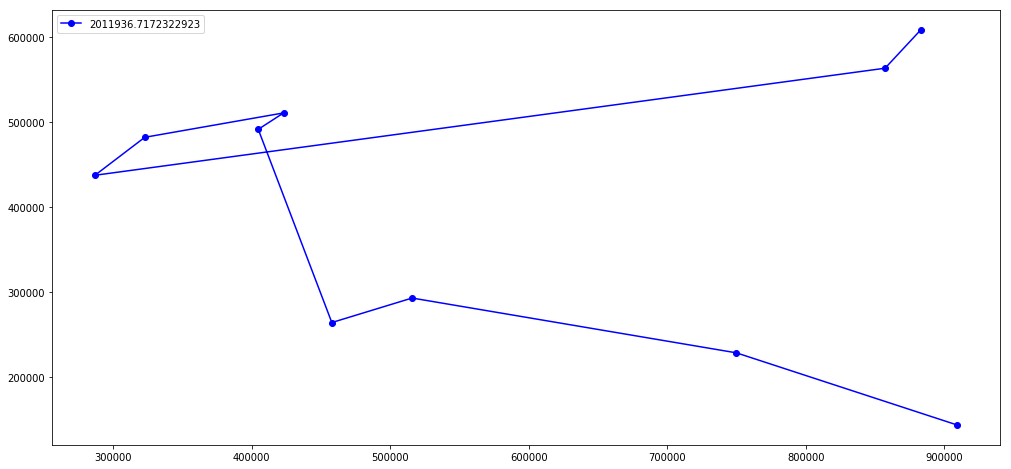

In [84]:
plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(vmp_array_x,vmp_array_y ,'ob-', label=str(vmp_dist))
plt.legend()

In [85]:
two_opt_array_x = []
two_opt_array_y = []
for i in two_opt_array:
    two_opt_array_x.append(i[0])
    two_opt_array_y.append(i[1])

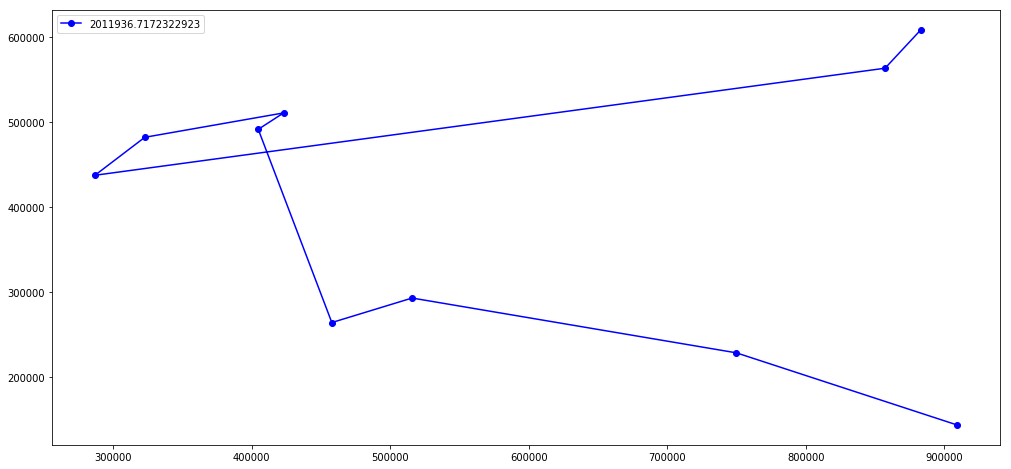

In [86]:
plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(two_opt_array_x,two_opt_array_y ,'ob-', label=str(two_opt_dist))
plt.legend()

# Gráfico do Resultado

In [87]:
resultado_vnd_x = []
resultado_vnd_y = []
for i in resultado_vnd:
    resultado_vnd_x.append(i[0])
    resultado_vnd_y.append(i[1])

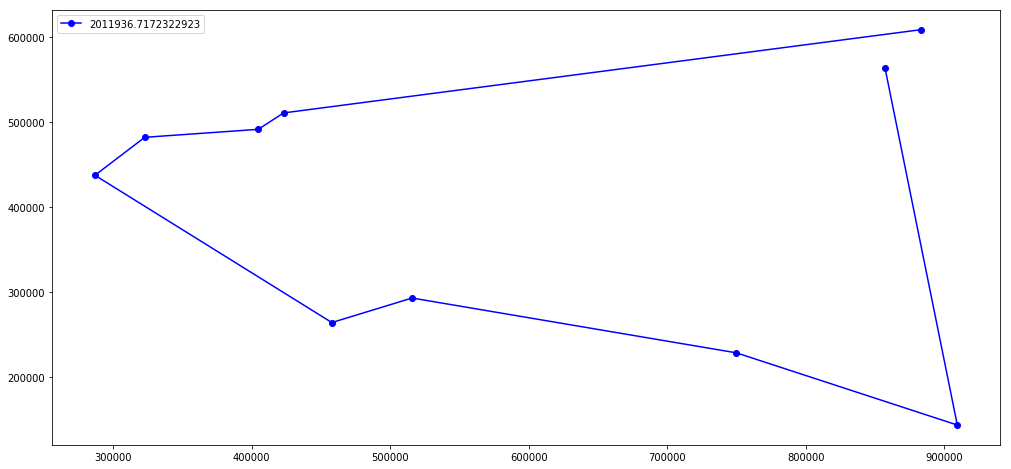

In [88]:
plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(resultado_vnd_x,resultado_vnd_y ,'ob-', label=str(two_opt_dist))
plt.legend()